# Setup

## Load data and imports

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


## Get test and train data

In [4]:
# for get_data
enable_feature_engineering = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.9, 0.0, 0.1)

In [5]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 86 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 2 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 186 rows -> systolic bp too low.
Dropped 47 rows -> systolic bp too high.
Dropped 40 rows -> diastolic bp too low.
Dropped 948 rows -> diastolic bp too high.
Dropped 103 rows -> sytolic bp was lower than diastolic.


# Model without tuning

## Create and train the model

In [6]:
#read in data
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [7]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [8]:
model = XGBClassifier()
model.fit(x_train, y_train)

print(model)

XGBClassifier()


In [9]:
scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=4)
print('Accuracy: %.8f (%.8f)' % (mean(scores), std(scores)))

Accuracy: 0.80053339 (0.00237027)


# Evaluation

## Prediction

In [10]:
y_prob = model.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)

Precision Score:
0.757184371972877

Recall Score:
0.6979166666666666

F1-Score:
0.726343503174849

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2745   752
Sick        1015  2345



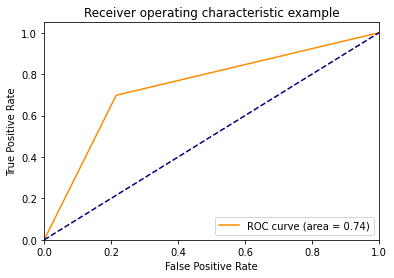


ROC Score:
0.7414376012772852


In [11]:
show_evaluation(y_test, y_pred, y_prob)

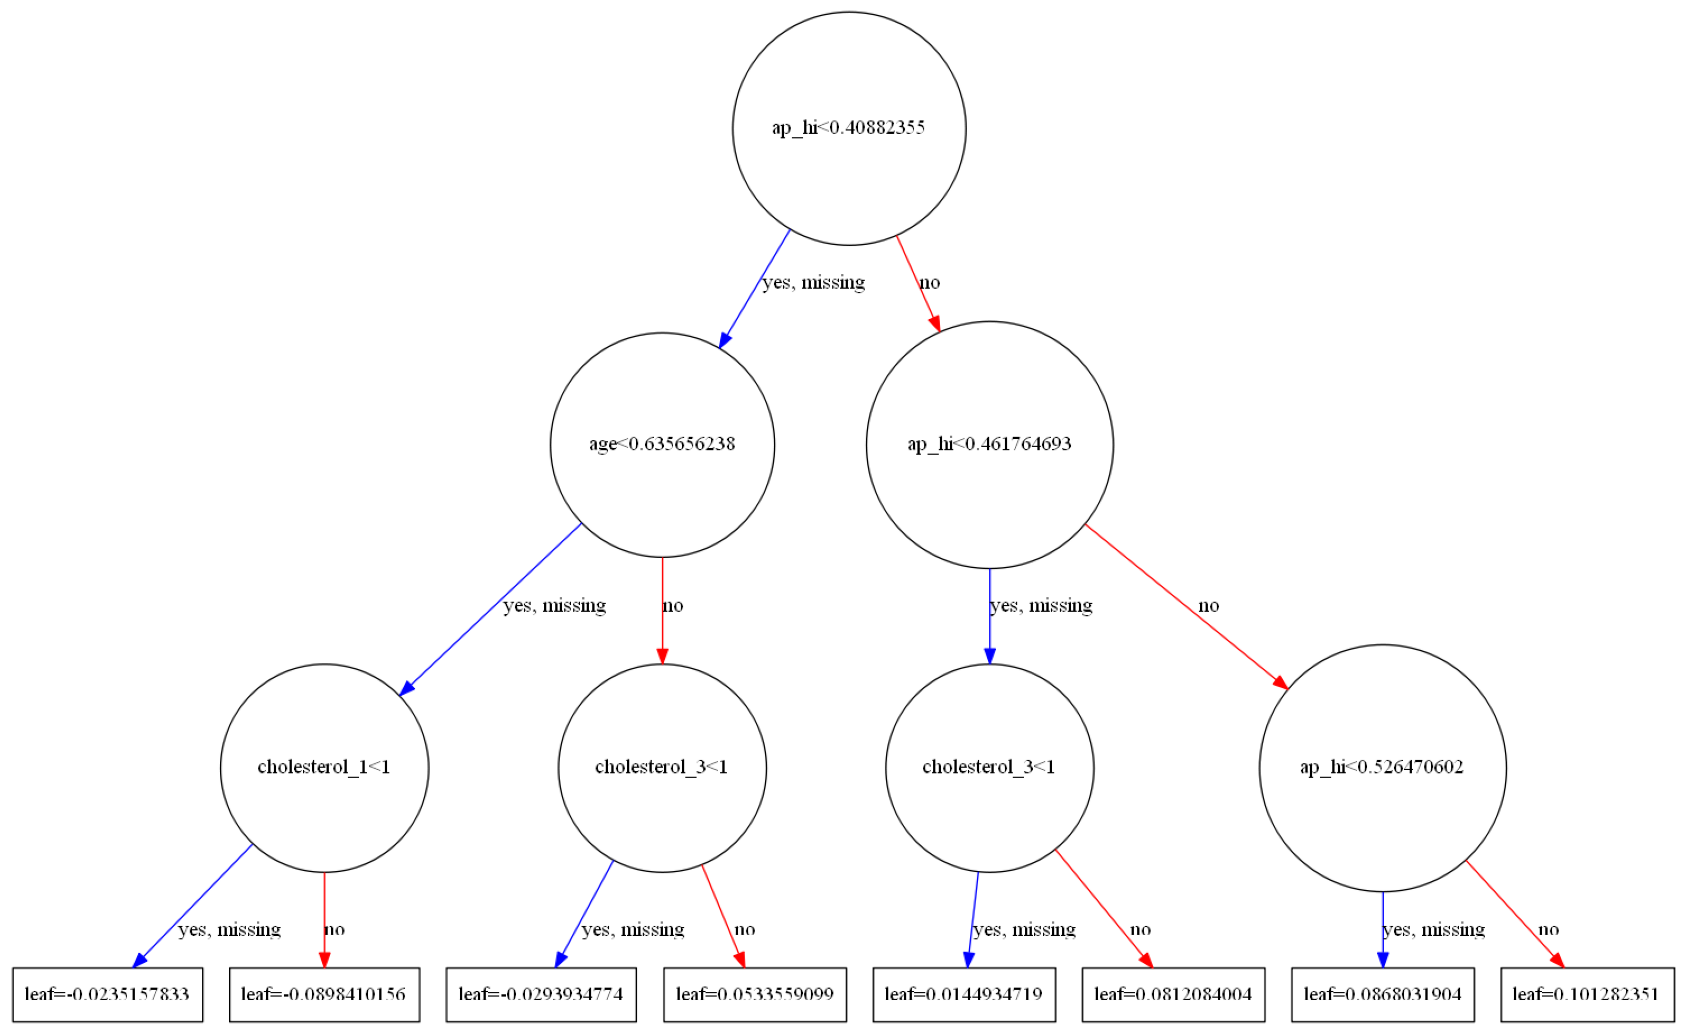

In [12]:
from graphviz import Digraph
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

## Most important variables

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

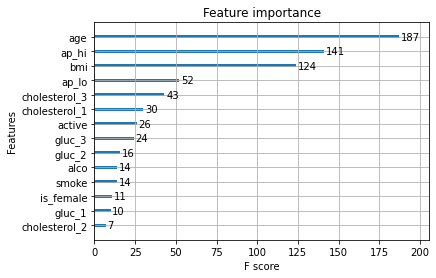

In [13]:
xgb.plot_importance(model)


# Model(s) with tuning

In [14]:
#Imports
from sklearn.model_selection import GridSearchCV   #Perforing grid search
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [15]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 9.22559295,  6.22612638,  5.78491998,  9.14620466,  8.67137823,
          8.9299839 , 12.19985223, 11.83144407, 11.6762414 , 16.15933461,
         24.36752567, 25.10392189]),
  'std_fit_time': array([ 1.41881528,  0.10021209,  0.33855174,  0.10164155,  0.12711407,
          0.29118435,  0.3430974 ,  0.26889376,  0.42670796,  0.66016634,
          9.21006087, 11.00967467]),
  'mean_score_time': array([0.09140248, 0.08660464, 0.08140392, 0.1078042 , 0.10420504,
         0.10240688, 0.11160426, 0.10500422, 0.1076067 , 0.14340568,
         0.17980614, 0.1348073 ]),
  'std_score_time': array([0.00926095, 0.01246869, 0.00755299, 0.02102798, 0.01716512,
         0.0209435 , 0.00911251, 0.00712739, 0.00849914, 0.01776022,
         0.03705347, 0.02405412]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         f

In [16]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([4.02207894, 4.37688408, 5.27266026, 8.5301908 , 5.53451104,
         5.85653682, 7.17692828, 7.03033152, 5.94571023]),
  'std_fit_time': array([0.03944017, 0.39756299, 0.35875763, 0.45513706, 0.05873474,
         0.15492526, 0.11412813, 0.11702907, 1.199732  ]),
  'mean_score_time': array([0.09100962, 0.07400589, 0.07400355, 0.08760428, 0.07960405,
         0.07580328, 0.09580402, 0.08780231, 0.08420272]),
  'std_score_time': array([0.01334564, 0.00887812, 0.0093358 , 0.00791634, 0.01156904,
         0.00479244, 0.01204019, 0.00879667, 0.01911378]),
  'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         

In [17]:
param_test2b = {
 'max_depth':[2,3,4],
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2b.fit(x_train,y_train)
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

({'mean_fit_time': array([4.1952796 , 4.24767852, 4.27367725, 4.11367526, 5.54550295,
         5.43330059, 5.56990476, 5.84470801, 6.87653012, 6.91932688,
         8.28119216, 7.59215083]),
  'std_fit_time': array([0.07938153, 0.21386879, 0.23467179, 0.04422529, 0.08624885,
         0.03512019, 0.05061472, 0.0909888 , 0.04695933, 0.08841466,
         1.17758117, 0.8820531 ]),
  'mean_score_time': array([0.08640485, 0.07460394, 0.06700468, 0.07360325, 0.08440371,
         0.07920585, 0.07860141, 0.07920475, 0.0970017 , 0.09100246,
         0.09040241, 0.08500304]),
  'std_score_time': array([0.00985246, 0.01029078, 0.00787558, 0.00445719, 0.00372024,
         0.00972564, 0.00542536, 0.00365453, 0.00878688, 0.00384645,
         0.01007245, 0.02314441]),
  'param_max_depth': masked_array(data=[2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [18]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([7.92309251, 7.40431066, 7.41703715, 7.66275482, 6.70047927]),
  'std_fit_time': array([0.18901369, 0.05891313, 0.11847887, 0.06270533, 1.20252532]),
  'mean_score_time': array([0.10083275, 0.103825  , 0.11136265, 0.10867815, 0.08752089]),
  'std_score_time': array([0.01435843, 0.01338402, 0.02902558, 0.02261853, 0.00564677]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.80581676, 0.80573151, 0.80573731, 0.80573795, 0.80575028]),
  'split1_test_score': array([0.80097006, 0.80096805, 0.80112873, 0.80101347, 0.80107151]),
  'split2_test_score': array([0.80424152, 0.8042346 , 0.80395561, 0.8042097 , 0.80391827]),
  'split3_test_score': array([0.79305109, 0.79300968, 0.79308182, 0.79304409, 0.79303897]),

In [19]:
model1 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0.0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

model1.fit(x_train,y_train)


y_prob1 = model1.predict(x_test.astype('float32'))
y_pred1 = np.round(y_prob1)

Precision Score:
0.7566784679755391

Recall Score:
0.6997023809523809

F1-Score:
0.7270759239214474

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2741   756
Sick        1009  2351



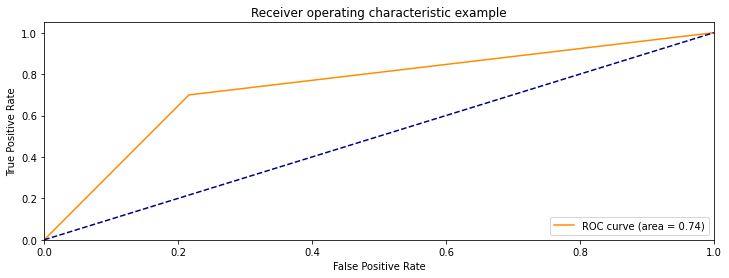


ROC Score:
0.7417585396326103


In [20]:
show_evaluation(y_test, y_pred1, y_prob1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

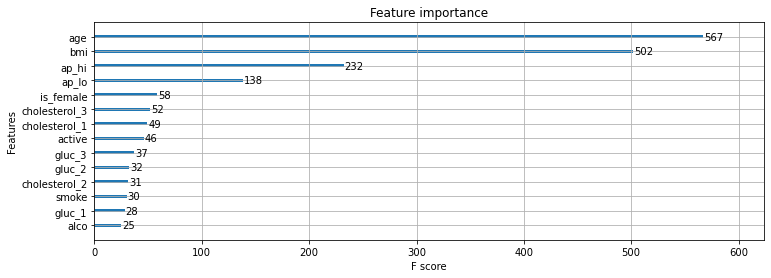

In [21]:
xgb.plot_importance(model1)

In [22]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}  
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([ 6.58152137,  6.32871842,  6.14091253,  5.81390867,  6.84652743,
          6.87012663,  6.39171667,  6.11111183,  7.57433987,  7.50560808,
          7.25832295,  7.13991756,  7.99465017,  9.82166991, 13.32392664,
         15.93980746]),
  'std_fit_time': array([0.11541827, 0.07764346, 0.09107576, 0.08122093, 0.11425159,
         0.21150224, 0.23210857, 0.06589389, 0.07350832, 0.05871606,
         0.1087154 , 0.08656763, 0.02454191, 2.46132893, 0.32467412,
         1.08946491]),
  'mean_score_time': array([0.10380635, 0.13440371, 0.09560671, 0.09320612, 0.09360375,
         0.08560433, 0.08920479, 0.08480201, 0.09360685, 0.09662766,
         0.0922061 , 0.0958045 , 0.08790779, 0.10785689, 0.11819487,
         0.14820247]),
  'std_score_time': array([0.02045064, 0.03027019, 0.01162261, 0.01338054, 0.01009253,
         0.00475868, 0.00556467, 0.00292562, 0.00545952, 0.01444941,
         0.01043592, 0.01342323, 0.00690527, 0.01804151, 0.00804458,
         0.021314

In [23]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([15.73769097, 15.59581456, 11.89619489, 14.56564221, 12.61416078,
         18.88180623, 26.62224998, 27.21364617, 23.50155768]),
  'std_fit_time': array([1.65046137, 3.879938  , 1.07472374, 0.87613773, 0.25560728,
         7.29347617, 1.11666403, 0.85728494, 3.62584794]),
  'mean_score_time': array([0.2311718 , 0.20081286, 0.15528326, 0.20254602, 0.15078902,
         0.26221619, 0.31038017, 0.28712387, 0.2608181 ]),
  'std_score_time': array([0.02385526, 0.05262114, 0.02746527, 0.02532686, 0.02412739,
         0.03249361, 0.03512594, 0.02485019, 0.01932376]),
  'param_colsample_bytree': masked_array(data=[0.65, 0.65, 0.65, 0.7, 0.7, 0.7, 0.75, 0.75, 0.75],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.85, 0.9, 0.95, 0.85, 0.9, 0.95, 0.85, 0.9, 0.95],
               mask=[False, False, False, False, False, Fa

In [24]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.95, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,cv=5)
gsearch6.fit(x_train,y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([31.92183237, 28.0512516 , 38.64208374, 35.93637238, 27.30114408]),
  'std_fit_time': array([4.97318691, 7.71890259, 0.62013292, 2.07257954, 8.145415  ]),
  'mean_score_time': array([0.25533271, 0.29610591, 0.37664375, 0.31261358, 0.27368383]),
  'std_score_time': array([0.02641477, 0.16808998, 0.07448548, 0.06587832, 0.03428804]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.80534423, 0.80539611, 0.80527005, 0.80540903, 0.80286786]),
  'split1_test_score': array([0.80103526, 0.80093705, 0.80113964, 0.80112556, 0.79873545]),
  'split2_test_score': array([0.80444751, 0.80462726, 0.80462389, 0.80445166, 0.80175652]),
  'split3_test_score': array([0.79423956, 0.79431333, 0.7941

In [25]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.95, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,cv=5)
gsearch7.fit(x_train,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([35.78292718, 32.23646274, 31.75730238, 37.16491146, 30.73410039]),
  'std_fit_time': array([1.57171952, 0.23031139, 0.63521161, 2.15529075, 6.46469346]),
  'mean_score_time': array([0.32414985, 0.25774903, 0.29810324, 0.35971727, 0.22761679]),
  'std_score_time': array([0.03804124, 0.03616018, 0.0564786 , 0.04904172, 0.04725109]),
  'param_reg_alpha': masked_array(data=[0, 0.001, 0.005, 0.01, 0.05],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 0.001},
   {'reg_alpha': 0.005},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.05}],
  'split0_test_score': array([0.8053442 , 0.80535221, 0.80539572, 0.80539611, 0.80545117]),
  'split1_test_score': array([0.80103521, 0.80103512, 0.80103527, 0.80093705, 0.80099338]),
  'split2_test_score': array([0.80444751, 0.80444772, 0.80462036, 0.80462726, 0.80446041]),
  'split3_test_score': array([0.79423956, 0.79423953, 

In [26]:
model2 = XGBClassifier( 
    learning_rate=0.1, 
    n_estimators=500, 
    max_depth=4,
    min_child_weight=6, 
    gamma=0.0, 
    subsample=0.95, 
    colsample_bytree=0.75,
    reg_alpha=0.05,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model2.fit(x_train,y_train)


y_prob2 = model2.predict(x_test.astype('float32'))
y_pred2 = np.round(y_prob2)

Precision Score:
0.7555627217026766

Recall Score:
0.6973214285714285

F1-Score:
0.7252747252747251

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2739   758
Sick        1017  2343



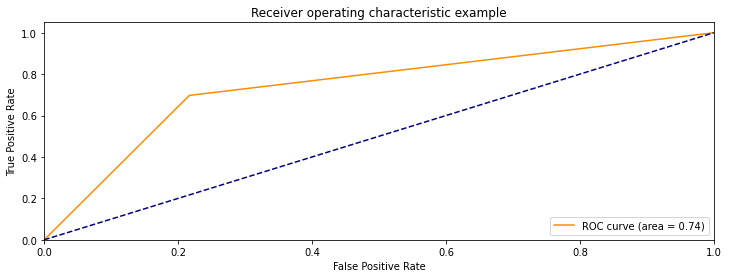


ROC Score:
0.740282104048368


In [27]:
show_evaluation(y_test, y_pred2, y_prob2)